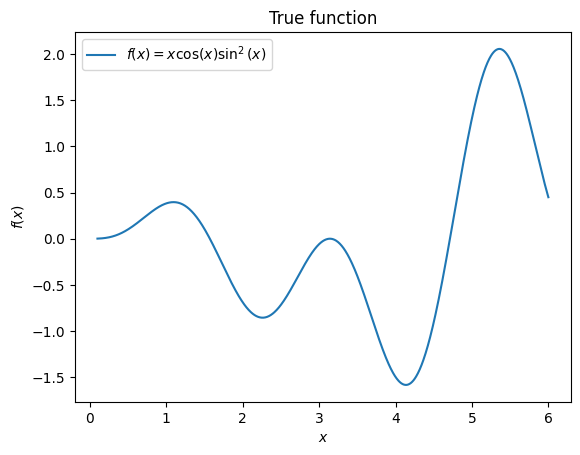

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(111) # set seed for reproducibility

xmin, xmax = 0.1, 6
init_points = 8
x = np.linspace(start=xmin, stop=xmax, num=1_000)
y = x * np.cos(x) * (np.sin(x) ** 2 )

plt.plot(x, y, label=r"$f(x) = x\cos(x)\sin^2(x)$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("True function")
plt.show()

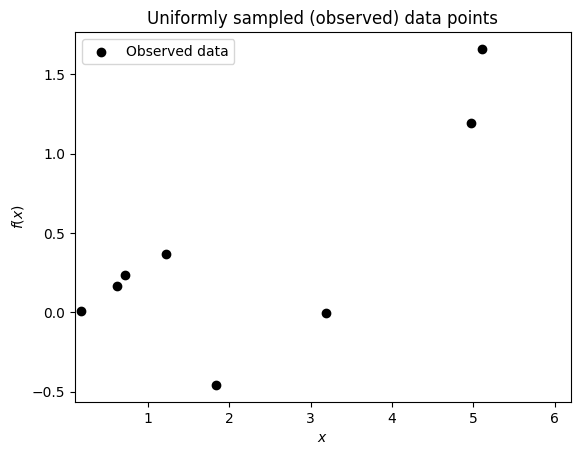

In [2]:
training_indices = np.random.choice(np.arange(y.size), size=init_points, replace=False)
x_train, y_train = x[training_indices].reshape(-1, 1), y[training_indices]

plt.scatter(x_train, y_train, label=r'Observed data', color='black')
plt.xlim(xmin,xmax+0.2)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Uniformly sampled (observed) data points")
plt.show()

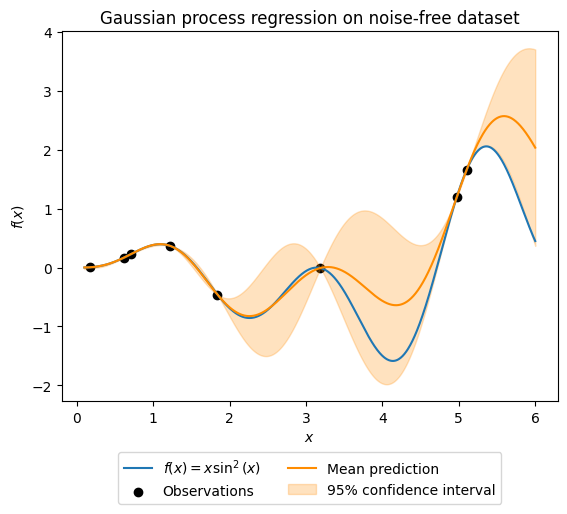

In [3]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 10))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_
mean_prediction, std_prediction = gaussian_process.predict(x.reshape(-1, 1), return_std=True)

plt.plot(x, y, label=r"$f(x) = x \sin^2(x)$")
plt.scatter(x_train, y_train, label="Observations", color='black')
plt.plot(x, mean_prediction, label="Mean prediction", color='darkorange')
plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color='darkorange',
    alpha=0.25,
    label=r"95% confidence interval",
)
plt.legend(loc="upper center", fancybox=True, bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")
plt.show()

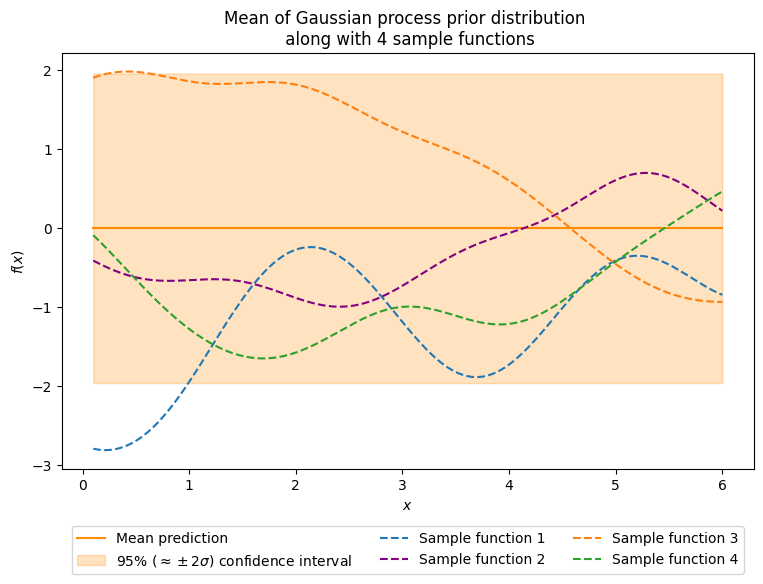

In [4]:
dpi = 700
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 10))

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

mean_prediction, std_prediction = gaussian_process.predict(x.reshape(-1, 1), return_std=True)
sample_funcs = gaussian_process.sample_y(x.reshape(-1,1), 4)

plt.figure(figsize=(8, 6))

plt.plot(x, mean_prediction, label="Mean prediction", color='darkorange')

plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color='darkorange',
    alpha=0.25,
    label=r"95% ($\approx\pm2\sigma$) confidence interval",
)

plt.plot(x, sample_funcs.T[0], label="Sample function 1", linestyle="--")
plt.plot(x, sample_funcs.T[1], label="Sample function 2", linestyle="--", color='purple')
plt.plot(x, sample_funcs.T[2], label="Sample function 3", linestyle="--")
plt.plot(x, sample_funcs.T[3], label="Sample function 4", linestyle="--")

plt.legend(loc="upper center", fancybox=True, bbox_to_anchor=(0.5, -0.12), ncol=3)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Mean of Gaussian process prior distribution \n along with 4 sample functions")
plt.tight_layout()
plt.savefig('prior.png', dpi=dpi)
plt.show()

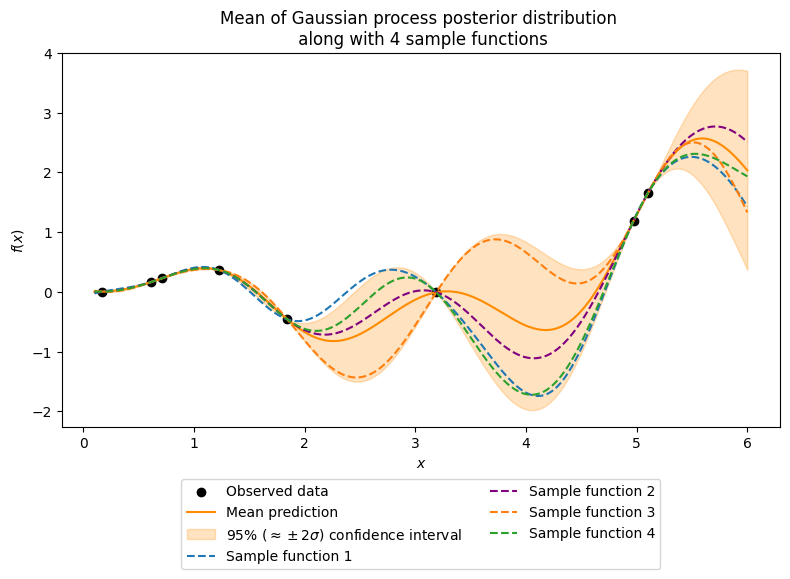

In [5]:
gaussian_process.fit(x_train, y_train)
mean_prediction, std_prediction = gaussian_process.predict(x.reshape(-1, 1), return_std=True)
sample_funcs = gaussian_process.sample_y(x.reshape(-1,1), 4)


plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label=r'Observed data', color='black')

plt.plot(x, mean_prediction, label="Mean prediction", color='darkorange')

plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color='darkorange',
    alpha=0.25,
    label=r"95% ($\approx\pm2\sigma$) confidence interval",
)

plt.plot(x, sample_funcs.T[0], label="Sample function 1", linestyle="--")
plt.plot(x, sample_funcs.T[1], label="Sample function 2", linestyle="--", color='purple')
plt.plot(x, sample_funcs.T[2], label="Sample function 3", linestyle="--")
plt.plot(x, sample_funcs.T[3], label="Sample function 4", linestyle="--")

plt.legend(loc="upper center", fancybox=True, bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.xlabel("$x$")
plt.ylabel(r"$f(x)$")
plt.title("Mean of Gaussian process posterior distribution \n along with 4 sample functions")
plt.tight_layout()
plt.savefig('posterior.png', dpi=dpi)
plt.show()

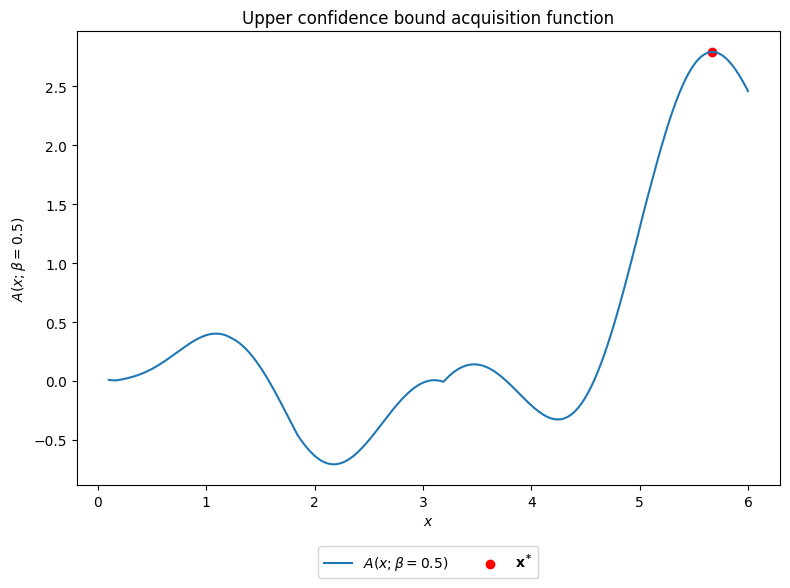

In [6]:
lamda = 0.5
plt.figure(figsize=(8, 6))

A = mean_prediction + lamda*std_prediction
plt.plot(x, A, label=r"$A(x;\beta=0.5)$")
max_point_idx = np.argmax(A)
plt.scatter(x[max_point_idx], A[max_point_idx], color="red", label=r"$\bf{x}^*$", marker='o')

plt.xlabel(r"$x$")
plt.ylabel(r"$A(x;\beta=0.5)$")
plt.title("Upper confidence bound acquisition function")
plt.legend(loc="upper center", fancybox=True, bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.tight_layout()
plt.savefig('acquisition.png', dpi=dpi)
plt.show()